In [14]:
%run 'Setup.py'

8 different classes: Electronic, Experimental, Folk, Hip-Hop, Instrumental, International, Pop or Rock.
objective 1: construct a classifier which, based on the features of a song, predicts its genre
objective 2: estimate its generalisation error under the 0–1 loss.
Features are real-valued, correspond to summary statistics (mean, sd, skewness, kurtosis, median, min, max) of 
time series of various music features, such as the chromagram or the Mel-frequency cepstrum.
Feature description: 

Feature description: 
chroma_cens: Chroma Energy Normalized (CENS, 12 chroma) - 84 features
chroma_cqt: Constant-Q chromagram (12 chroma) - 84 features
chroma_stft: Chromagram (12 chroma) - 84 features
mfcc: Mel-frequency cepstrum (20 coefficients) - 140 features
rmse: Root-mean-square - 7 features
spectral_bandwidth: Spectral bandwidth - 7 features
spectral_centroid: Spectral centroid - 7 features
spectral_contrast: Spectral contrast (7 frequency bands) - 49 features
spectral_rolloff: Roll-off freque

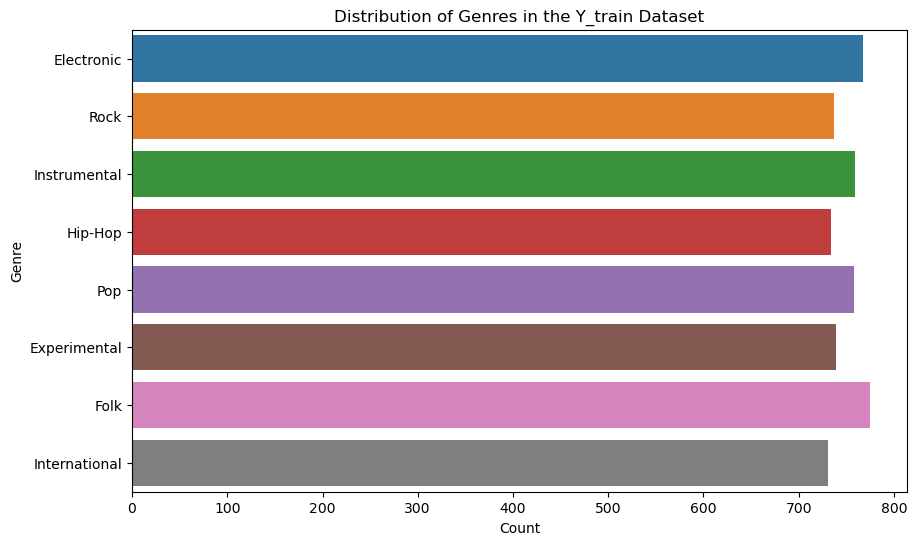

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=y_train, y='Genre')
plt.title('Distribution of Genres in the Y_train Dataset')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [27]:
def create_feature_element_scatter(x_train, y_train, feature_x, element_x, feature_y, element_y, statistic,genre_column='Genre'):
    """
    Creates a scatter plot comparing two features at specified elements, colored by genre.

    Parameters:
    - x_train (pd.DataFrame): DataFrame containing the feature data.
    - y_train (pd.DataFrame): DataFrame containing the genre data.
    - feature_x (str): The name of the feature for the x-axis.
    - element_x (int): The element number for the x-axis feature.
    - feature_y (str): The name of the feature for the y-axis.
    - element_y (int): The element number for the y-axis feature.
    - genre_column (str): The column name in y_train that contains genre labels.

    The function assumes the column naming convention "{feature}.{statistic}.{element}".
    """
    # Merge y_train for genre information
    x_train_with_genre = x_train.merge(y_train, left_index=True, right_on='Id')

    # Construct column names based on inputs
    column_x = f"{feature_x}_{statistic}_{str(element_x).zfill(2)}"
    column_y = f"{feature_y}_{statistic}_{str(element_y).zfill(2)}"

    # Check if the specified columns exist in the DataFrame
    if column_x not in x_train_with_genre.columns or column_y not in x_train_with_genre.columns:
        print(f"Columns {column_x} or {column_y} not found in the dataset.")
        return

    # Create the plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
    sns.scatterplot(x=x_train_with_genre[column_x], y=x_train_with_genre[column_y],
                    hue=x_train_with_genre[genre_column], ax=ax, s=30, palette='rainbow')
    ax.set_title(f"{feature_y} STD vs {feature_x} STD on {element_x}th element")
    # Adjust limits if needed, or remove for automatic scaling
    ax.set(ylim=(0, 10))
    ax.set(xlim=(0, 15))
    fig.tight_layout()
    plt.show()

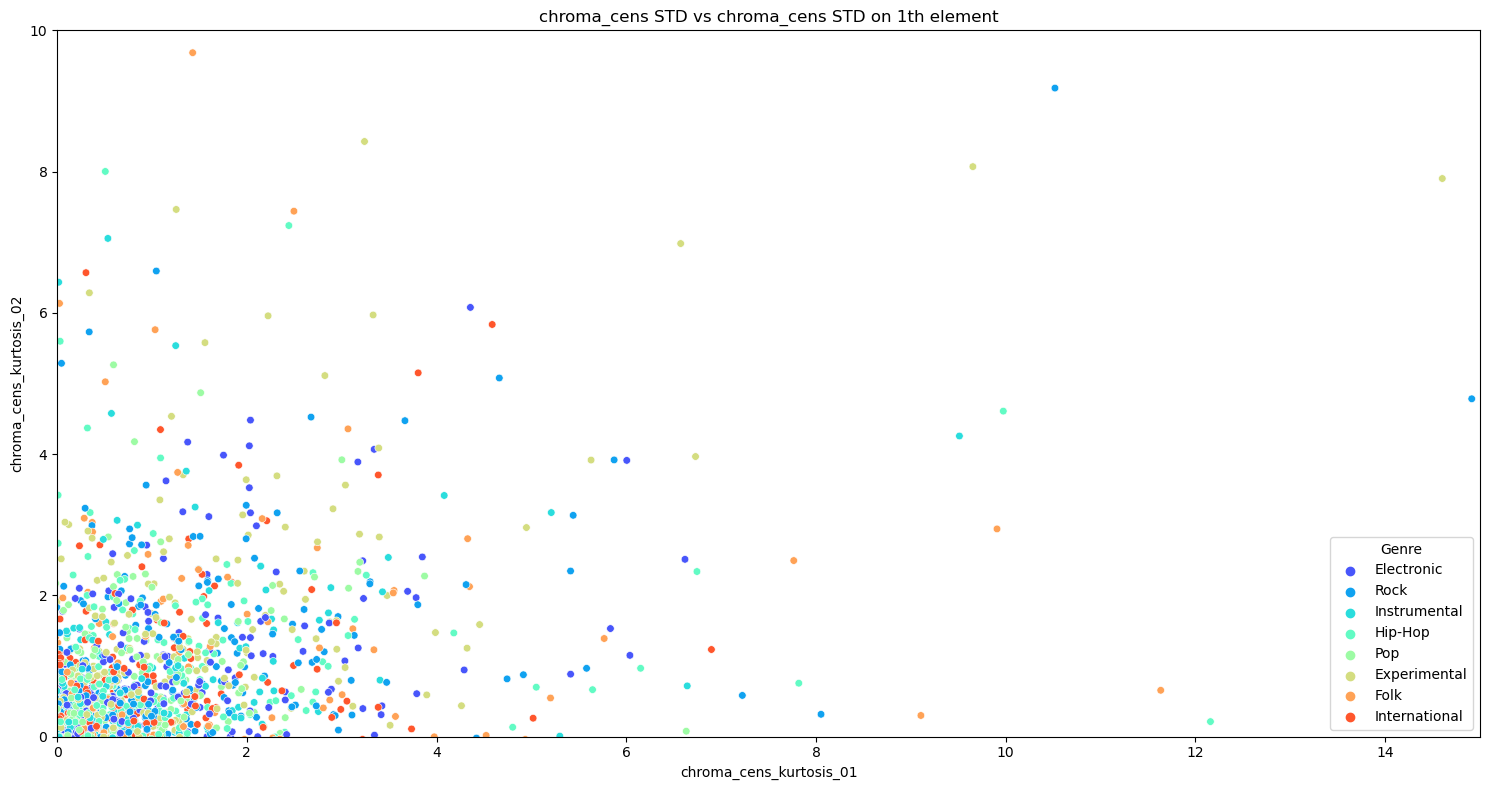

In [28]:
create_feature_element_scatter(x_train, y_train, 'chroma_cens', 1, 'chroma_cens', 2, statistic='kurtosis')

Index(['chroma_cens_kurtosis_01', 'chroma_cens_kurtosis_02',
       'chroma_cens_kurtosis_03', 'chroma_cens_kurtosis_04',
       'chroma_cens_kurtosis_05', 'chroma_cens_kurtosis_06',
       'chroma_cens_kurtosis_07', 'chroma_cens_kurtosis_08',
       'chroma_cens_kurtosis_09', 'chroma_cens_kurtosis_10',
       ...
       'tonnetz_std_04', 'tonnetz_std_05', 'tonnetz_std_06', 'zcr_kurtosis_01',
       'zcr_max_01', 'zcr_mean_01', 'zcr_median_01', 'zcr_min_01',
       'zcr_skew_01', 'zcr_std_01'],
      dtype='object', length=518)